In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import geopandas as gpd

In [14]:
file_tracts = '../resource_files/bexar_county/Bexar_County_Census_Tracts-shp/Bexar_County_Census_Tracts.shp'
file_block_groups = '../resource_files/bexar_county/Bexar_County_Census_Block_Groups-shp/Bexar_County_Census_Block_Groups.shp'

In [15]:
gdf_block_groups = gpd.read_file(file_block_groups)

In [16]:
gdf_block_groups.head()

,OBJECTID,BLOCKGROUP,SUM_POPULA,Shape_STAr,Shape_STLe,ShapeSTAre,ShapeSTLen,geometry
0,1,480291101001,955,1.951706e+07,23279.128568,1.951706e+07,23279.128568,"POLYGON ((-98.48695 29.43502, -98.48626 29.434..."
1,2,480291101002,694,7.319464e+06,14609.297870,7.319464e+06,14609.297870,"POLYGON ((-98.48824 29.41933, -98.48826 29.418..."
2,3,480291101003,1730,1.133205e+07,14546.232289,1.133205e+07,14546.232289,"POLYGON ((-98.49432 29.43370, -98.49426 29.433..."
3,4,480291103001,1041,4.292228e+06,9662.074836,4.292228e+06,9662.074836,"POLYGON ((-98.47984 29.40970, -98.47983 29.409..."
4,5,480291103002,797,4.074139e+06,10523.204970,4.074139e+06,10523.204970,"POLYGON ((-98.47989 29.40860, -98.47992 29.408..."


In [19]:
gdf_block_groups.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    1084 non-null   int64   
 1   BLOCKGROUP  1084 non-null   object  
 2   SUM_POPULA  1084 non-null   int64   
 3   Shape_STAr  1084 non-null   float64 
 4   Shape_STLe  1084 non-null   float64 
 5   ShapeSTAre  1084 non-null   float64 
 6   ShapeSTLen  1084 non-null   float64 
 7   geometry    1084 non-null   geometry
dtypes: float64(4), geometry(1), int64(2), object(1)
memory usage: 67.9+ KB


In [6]:
file_stops =  '../resource_files/google_transit/stops.csv'

In [7]:
df_stops = pd.read_csv(file_stops)

In [8]:
df_stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,25316,25316,BLANCO & DRESDEN,NaN,29.499014,-98.507783,NaN,NaN,NaN,NaN,NaN,0
1,72479,72479,FRESNO & IH-10 W ACCESS RD.,NaN,29.474488,-98.516238,NaN,NaN,NaN,NaN,NaN,0
2,56239,56239,FREDERICKSBURG RD. & N. FLORES,NaN,29.441883,-98.503773,NaN,NaN,NaN,NaN,NaN,0
3,76759,76759,MARTIN & N. FRIO,NaN,29.430081,-98.503058,NaN,NaN,NaN,NaN,NaN,0
4,88973,88973,DOLOROSA & S. FLORES,NaN,29.424073,-98.494741,NaN,NaN,NaN,NaN,NaN,0


In [30]:
df_stops.describe()

,stop_id,stop_code,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
count,6491.000000,6491.000000,6491.000000,6491.000000,0.0,0.0,0.0,0.0,0.0,6491.0
mean,55405.448313,55405.448313,29.455182,-98.522178,NaN,NaN,NaN,NaN,NaN,0.0
std,27111.251565,27111.251565,0.064817,0.077617,NaN,NaN,NaN,NaN,NaN,0.0
min,10013.000000,10013.000000,29.294060,-98.711000,NaN,NaN,NaN,NaN,NaN,0.0
25%,29846.000000,29846.000000,29.408544,-98.573360,NaN,NaN,NaN,NaN,NaN,0.0
50%,55429.000000,55429.000000,29.450496,-98.517246,NaN,NaN,NaN,NaN,NaN,0.0
75%,79626.500000,79626.500000,29.503407,-98.468857,NaN,NaN,NaN,NaN,NaN,0.0
max,99996.000000,99996.000000,29.650497,-98.306921,NaN,NaN,NaN,NaN,NaN,0.0


In [10]:
gdf_stops = gpd.GeoDataFrame(
    df_stops,
    geometry = gpd.points_from_xy(df_stops.stop_lon, df_stops.stop_lat)
)

In [11]:
gdf_stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding,geometry
0,25316,25316,BLANCO & DRESDEN,NaN,29.499014,-98.507783,NaN,NaN,NaN,NaN,NaN,0,POINT (-98.50778 29.49901)
1,72479,72479,FRESNO & IH-10 W ACCESS RD.,NaN,29.474488,-98.516238,NaN,NaN,NaN,NaN,NaN,0,POINT (-98.51624 29.47449)
2,56239,56239,FREDERICKSBURG RD. & N. FLORES,NaN,29.441883,-98.503773,NaN,NaN,NaN,NaN,NaN,0,POINT (-98.50377 29.44188)
3,76759,76759,MARTIN & N. FRIO,NaN,29.430081,-98.503058,NaN,NaN,NaN,NaN,NaN,0,POINT (-98.50306 29.43008)
4,88973,88973,DOLOROSA & S. FLORES,NaN,29.424073,-98.494741,NaN,NaN,NaN,NaN,NaN,0,POINT (-98.49474 29.42407)


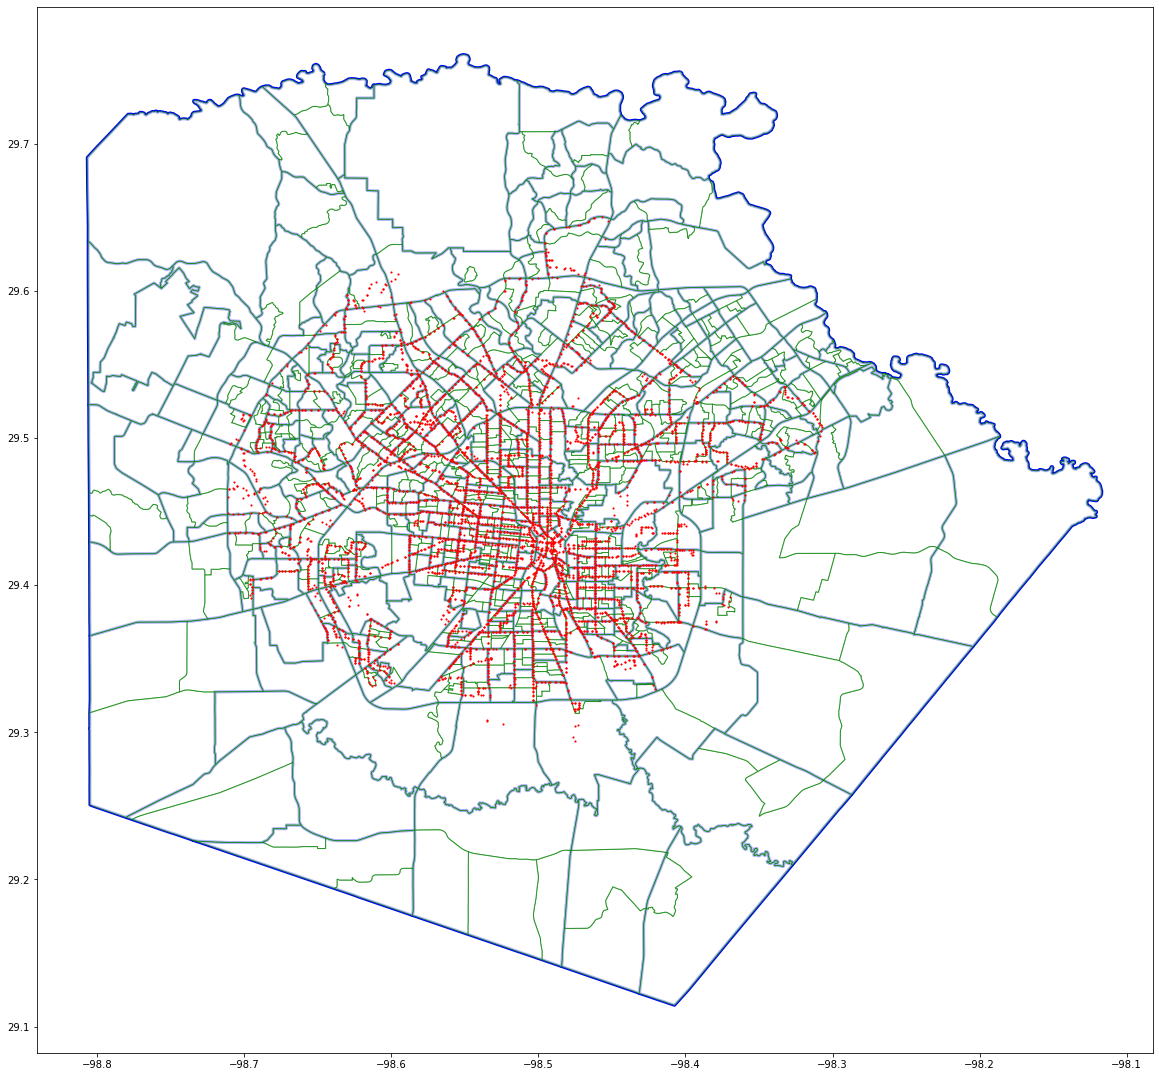

In [29]:
axt = gdf_tracts.plot(color='white', edgecolor='blue', figsize=(20,20), linewidth=3)
axbg = gdf_block_groups.plot(ax=axt, color='white', edgecolor='green', alpha=0.7, figsize=(20,20))
ax1 = gdf_stops.plot(ax=axbg, color='red', marker='.',markersize=5, figsize=(20,20))
plt.show()